In [2]:
import folium
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


ROOT_DATA = "./data/raw/accidente-de-trafico-en-bogota-entre-2007-y-2017-geopoint.csv"

In [3]:
df = pd.read_csv(ROOT_DATA, sep=';')

# TODO: IMPROVE THIS 
df["lat"] = df["Geo Point"].apply(lambda x: float(x.split(",")[0].strip()))
df["lon"] = df["Geo Point"].apply(lambda x: float(x.split(",")[1].strip()))
df

,Geo Point,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA,HORA_OCURRENCIA,ANO_OCURRENCIA,MES_OCURRENCIA,DIA_OCURRENCIA,DIRECCION,GRAVEDAD,CLASE,LOCALIDAD,AREAS_TRANSITO,CUADRANTE_TRANSITO,MUNICIPIO,TEXTO_OBSERVACIONES,FECHA_HORA,lat,lon
0,"4.655401615, -74.101699558",646545,A00410124,306211,Fri Sep 05 00:00:00 CEST 2008,12:50:00,2008,SEPTIEMBRE,VIERNES,AK 68-44 02,CON HERIDOS,ATROPELLO,TEUSAQUILLO,4.0,CT 04-4,BOGOTA,NaN,Fri Sep 05 12:49:59 CEST 2008,4.655402,-74.101700
1,"4.68941675, -74.109350811",563782,839933000,291565,Tue May 20 00:00:00 CEST 2008,23:40:00,2008,MAYO,MARTES,AV CIUDAD DE CALI-CL 66 02,SOLO DANOS,CHOQUE,ENGATIVA,5.0,CT 05-2,BOGOTA,NaN,Tue May 20 23:40:00 CEST 2008,4.689417,-74.109351
2,"4.689749817, -74.10901617",4398952,A000038718,4398952,Thu Dec 04 00:00:00 CET 2014,17:30:00,2014,DICIEMBRE,JUEVES,AV AVENIDA CIUDAD DE CALI-CL 66A 02,SOLO DANOS,CHOQUE,ENGATIVA,5.0,CT 05-2,BOGOTA,NaN,Thu Dec 04 17:30:00 CET 2014,4.689750,-74.109016
3,"4.615128763, -74.108947186",1612,726750500,30243,Fri Jun 29 00:00:00 CEST 2007,19:30:00,2007,JUNIO,VIERNES,TR 40A-5 32,CON HERIDOS,ATROPELLO,PUENTE ARANDA,8.0,CT 08-1,BOGOTA,NaN,Fri Jun 29 19:30:00 CEST 2007,4.615129,-74.108947
4,"4.646695747, -74.108791627",569692,840564600,297475,Mon Jul 21 00:00:00 CEST 2008,07:30:00,2008,JULIO,LUNES,KR 68-22A 02,SOLO DANOS,CHOQUE,TEUSAQUILLO,4.0,CT 04-4,BOGOTA,NaN,Mon Jul 21 07:30:00 CEST 2008,4.646696,-74.108792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330058,"4.671688105, -74.145705017",1707169,A00719849,352633,Thu Mar 04 00:00:00 CET 2010,14:30:00,2010,MARZO,JUEVES,KR 99-CL21BIS 02,SOLO DANOS,CHOQUE,FONTIBON,5.0,CT 05-4,BOGOTA,NaN,Thu Mar 04 14:30:00 CET 2010,4.671688,-74.145705
330059,"4.5494617470000005, -74.154414552",9682,712264000,16686,Wed Mar 07 00:00:00 CET 2007,11:00:00,2007,MARZO,MIERCOLES,CL 70-19D S 61,SOLO DANOS,CHOQUE,CIUDAD BOLIVAR,11.0,CT 11-2,BOGOTA,NaN,Wed Mar 07 11:00:00 CET 2007,4.549462,-74.154415
330060,"4.596006197, -74.15804028",4421360,A12506,4421360,Wed Aug 19 00:00:00 CEST 2015,16:50:00,2015,AGOSTO,MIERCOLES,AV AVENIDA DEL SUR-CL 67 S 02,SOLO DANOS,CHOQUE,CIUDAD BOLIVAR,11.0,CT 07-1,BOGOTA,NaN,Wed Aug 19 16:50:00 CEST 2015,4.596006,-74.158040
330061,"4.645297746, -74.086860579",60219,828721300,673,Sat Jan 05 00:00:00 CET 2008,19:27:00,2008,ENERO,SABADO,KR 50-55 2,SOLO DANOS,CHOQUE,TEUSAQUILLO,4.0,CT 04-4,BOGOTA,NaN,Sat Jan 05 19:27:00 CET 2008,4.645298,-74.086861


## Statistics

In [4]:
display(df.info(), df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330063 entries, 0 to 330062
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Geo Point            330063 non-null  object 
 1   OBJECTID             330063 non-null  int64  
 2   FORMULARIO           330063 non-null  object 
 3   CODIGO_ACCIDENTE     330063 non-null  int64  
 4   FECHA_OCURRENCIA     330063 non-null  object 
 5   HORA_OCURRENCIA      330063 non-null  object 
 6   ANO_OCURRENCIA       330063 non-null  int64  
 7   MES_OCURRENCIA       330063 non-null  object 
 8   DIA_OCURRENCIA       330063 non-null  object 
 9   DIRECCION            330063 non-null  object 
 10  GRAVEDAD             330060 non-null  object 
 11  CLASE                329880 non-null  object 
 12  LOCALIDAD            330052 non-null  object 
 13  AREAS_TRANSITO       330049 non-null  float64
 14  CUADRANTE_TRANSITO   328309 non-null  object 
 15  MUNICIPIO        

None

Geo Point                   0
OBJECTID                    0
FORMULARIO                  0
CODIGO_ACCIDENTE            0
FECHA_OCURRENCIA            0
HORA_OCURRENCIA             0
ANO_OCURRENCIA              0
MES_OCURRENCIA              0
DIA_OCURRENCIA              0
DIRECCION                   0
GRAVEDAD                    3
CLASE                     183
LOCALIDAD                  11
AREAS_TRANSITO             14
CUADRANTE_TRANSITO       1754
MUNICIPIO                   0
TEXTO_OBSERVACIONES    316231
FECHA_HORA                  0
lat                         0
lon                         0
dtype: int64

In [5]:
display(
    df["GRAVEDAD"].unique(),
    df["CLASE"].unique(),
    df["LOCALIDAD"].unique(),
    df["TEXTO_OBSERVACIONES"].unique(),
)

array(['CON HERIDOS', 'SOLO DANOS', 'CON MUERTOS', nan], dtype=object)

array(['ATROPELLO', 'CHOQUE', 'OTRO', 'VOLCAMIENTO', 'CAIDA DE OCUPANTE',
       'AUTOLESION', nan, 'INCENDIO'], dtype=object)

array(['TEUSAQUILLO', 'ENGATIVA', 'PUENTE ARANDA', 'RAFAEL URIBE URIBE',
       'SUBA', 'LOS MARTIRES', 'FONTIBON', 'USME', 'CIUDAD BOLIVAR',
       'KENNEDY', 'TUNJUELITO', 'ANTONIO NARINO', 'BOSA', 'CHAPINERO',
       'BARRIOS UNIDOS', 'USAQUEN', 'SANTA FE', 'CANDELARIA',
       'SAN CRISTOBAL', nan, 'CANDELARIO'], dtype=object)

array([nan, 'NO SE DIAGRAMAN LOS VEHICULOS YA QUE FUERON MOVIDOS',
       'VEHICULOS FUERON MOVIDOS DEL LUGAR', ...,
       'VEHICULO CHOCA CON LA VIVIENDA DE LA SEÑORA ANA ISABEL PARRA  ZAPATA CEDULA  51646203',
       'NO UTILIZA ELMPASO PEATONAL',
       'SE REALIZAN COMPARENDO 3208484111 Y 31240715'],
      shape=(9288,), dtype=object)

## geopandas

In [6]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['lon'], df['lat']))
gdf

,Geo Point,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA,HORA_OCURRENCIA,ANO_OCURRENCIA,MES_OCURRENCIA,DIA_OCURRENCIA,DIRECCION,...,CLASE,LOCALIDAD,AREAS_TRANSITO,CUADRANTE_TRANSITO,MUNICIPIO,TEXTO_OBSERVACIONES,FECHA_HORA,lat,lon,geometry
0,"4.655401615, -74.101699558",646545,A00410124,306211,Fri Sep 05 00:00:00 CEST 2008,12:50:00,2008,SEPTIEMBRE,VIERNES,AK 68-44 02,...,ATROPELLO,TEUSAQUILLO,4.0,CT 04-4,BOGOTA,NaN,Fri Sep 05 12:49:59 CEST 2008,4.655402,-74.101700,POINT (-74.1017 4.6554)
1,"4.68941675, -74.109350811",563782,839933000,291565,Tue May 20 00:00:00 CEST 2008,23:40:00,2008,MAYO,MARTES,AV CIUDAD DE CALI-CL 66 02,...,CHOQUE,ENGATIVA,5.0,CT 05-2,BOGOTA,NaN,Tue May 20 23:40:00 CEST 2008,4.689417,-74.109351,POINT (-74.10935 4.68942)
2,"4.689749817, -74.10901617",4398952,A000038718,4398952,Thu Dec 04 00:00:00 CET 2014,17:30:00,2014,DICIEMBRE,JUEVES,AV AVENIDA CIUDAD DE CALI-CL 66A 02,...,CHOQUE,ENGATIVA,5.0,CT 05-2,BOGOTA,NaN,Thu Dec 04 17:30:00 CET 2014,4.689750,-74.109016,POINT (-74.10902 4.68975)
3,"4.615128763, -74.108947186",1612,726750500,30243,Fri Jun 29 00:00:00 CEST 2007,19:30:00,2007,JUNIO,VIERNES,TR 40A-5 32,...,ATROPELLO,PUENTE ARANDA,8.0,CT 08-1,BOGOTA,NaN,Fri Jun 29 19:30:00 CEST 2007,4.615129,-74.108947,POINT (-74.10895 4.61513)
4,"4.646695747, -74.108791627",569692,840564600,297475,Mon Jul 21 00:00:00 CEST 2008,07:30:00,2008,JULIO,LUNES,KR 68-22A 02,...,CHOQUE,TEUSAQUILLO,4.0,CT 04-4,BOGOTA,NaN,Mon Jul 21 07:30:00 CEST 2008,4.646696,-74.108792,POINT (-74.10879 4.6467)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330058,"4.671688105, -74.145705017",1707169,A00719849,352633,Thu Mar 04 00:00:00 CET 2010,14:30:00,2010,MARZO,JUEVES,KR 99-CL21BIS 02,...,CHOQUE,FONTIBON,5.0,CT 05-4,BOGOTA,NaN,Thu Mar 04 14:30:00 CET 2010,4.671688,-74.145705,POINT (-74.14571 4.67169)
330059,"4.5494617470000005, -74.154414552",9682,712264000,16686,Wed Mar 07 00:00:00 CET 2007,11:00:00,2007,MARZO,MIERCOLES,CL 70-19D S 61,...,CHOQUE,CIUDAD BOLIVAR,11.0,CT 11-2,BOGOTA,NaN,Wed Mar 07 11:00:00 CET 2007,4.549462,-74.154415,POINT (-74.15441 4.54946)
330060,"4.596006197, -74.15804028",4421360,A12506,4421360,Wed Aug 19 00:00:00 CEST 2015,16:50:00,2015,AGOSTO,MIERCOLES,AV AVENIDA DEL SUR-CL 67 S 02,...,CHOQUE,CIUDAD BOLIVAR,11.0,CT 07-1,BOGOTA,NaN,Wed Aug 19 16:50:00 CEST 2015,4.596006,-74.158040,POINT (-74.15804 4.59601)
330061,"4.645297746, -74.086860579",60219,828721300,673,Sat Jan 05 00:00:00 CET 2008,19:27:00,2008,ENERO,SABADO,KR 50-55 2,...,CHOQUE,TEUSAQUILLO,4.0,CT 04-4,BOGOTA,NaN,Sat Jan 05 19:27:00 CET 2008,4.645298,-74.086861,POINT (-74.08686 4.6453)


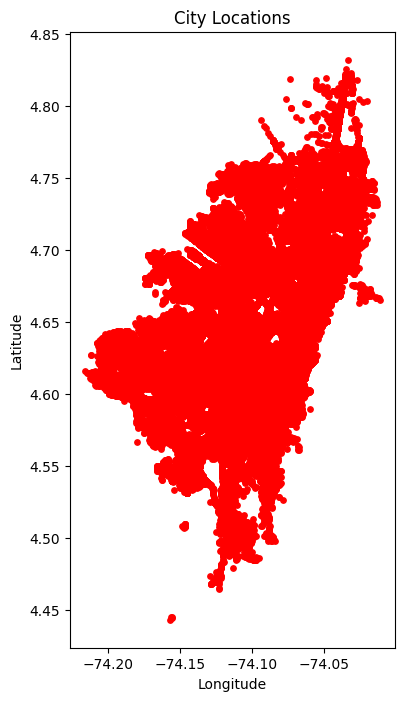

In [7]:
gdf.plot(marker='o', color='red', markersize=15, figsize=(8, 8))
plt.title('City Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [14]:
bogota_map = folium.Map(
    location=[4.6485784, -74.4031911],
    zoom_start=11,
    tiles="CartoDB Positron",
)

bogota_map

In [ ]:


fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
geo_df.plot(column="Type", ax=ax, legend=True)
plt.title("Volcanoes")


In [12]:
map = folium.Map(location=[13.406, 80.110], tiles="CartoDB Positron", zoom_start=9)
map